In [1]:
from __future__ import print_function, division
import numpy as np
import geopandas as gp
import pandas as pd
import json 
import pylab as pl 
import datetime 
import shapely
import os
import sys
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


VZ priority corridors, intersection and zone have not yet been read in. I believe those are areas that were identified as in need of help, but any help would be seen in the jsons for the actual improvements(?) 
http://www.nyc.gov/html/dot/downloads/misc/leading_pedestrian_interval_signals_shapefile.zip

In [344]:
# NYC high crash corriders, leading pedestrian signals, slow zones, safe streets, speed bumps, improvements
improvements = ['arterial_slow_zones', 'leading_pedestrian_interval_signals', 'neighborhood_slow_zones', 
                'safe_streets_for_seniors', 'speed_bumps', 'street_improvement_projects_intersections', 
                'street_improvement_projects_corridors']


In [345]:
for improvement in improvements:
    '''collects and unzips shapefiles '''
    url_begin = 'http://www.nyc.gov/html/dot/downloads/misc/'
    url_end = '_shapefile.zip'
    os.system('! curl -O ' + url_begin + improvement + url_end)

    
for improvement in improvements:
    
    zip_ref = zipfile.ZipFile(improvement + url_end, 'r')
    zip_ref.extractall('VZ_data/')
    zip_ref.close()
    os.system('mv ' + improvement + url_end + ' ' + 'VZ_data/')
   

In [346]:
def dataframe_it(improvement):
    '''takes improvement, returns geodataframe'''
    try:
        df = gp.GeoDataFrame.from_file('VZ_data/' + improvement.title() + '/' + improvement.title() + '.shp')
    except:
        
        if improvement == 'speed_bumps':
            df = gp.GeoDataFrame.from_file('VZ_data/' + 'speed_bumps_2014.shp')
        elif improvement == 'street_improvement_projects_intersections':
            df = gp.GeoDataFrame.from_file('VZ_data/' + 'street_improvement_projects_2013_2014_intersections.shp')
        elif improvement == 'street_improvement_projects_corridors':
            df = gp.GeoDataFrame.from_file('VZ_data/' + 'street_improvement_projects_2013_2014_corridors.shp')
        else:
            df = gp.GeoDataFrame.from_file('VZ_data/' + improvement + '.shp')
    return df     

In [347]:
arterial_slow_zone = dataframe_it(improvements[0])
ped_signals = dataframe_it(improvements[1])
neigh_slow_zone = dataframe_it(improvements[2])
sr_safe_strs = dataframe_it(improvements[3])
speed_bumps = dataframe_it(improvements[4])
intersec_proj = dataframe_it(improvements[5])
corridor_proj = dataframe_it(improvements[6])

In [348]:
! curl -O http://www.nyc.gov/html/dot/downloads/misc/summary_police_precincts.zip
zip_ref = zipfile.ZipFile('summary_police_precincts.zip', 'r')
zip_ref.extractall('VZ_data/Precincts')
zip_ref.close()
os.system('mv ' + 'summary_police_precincts.zip ' + 'VZ_data/')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1003k  100 1003k    0     0  4295k      0 --:--:-- --:--:-- --:--:-- 4421k


0

In [3]:
precincts = gp.GeoDataFrame.from_file(os.getenv('HOME') + '/Applied_Data_Science/VZ_data/Precincts/summary_police_precincts.shp')

In [16]:
precincts_shp = precincts.drop([u'Ages_10_to', u'Ages_15_to', u'Ages_18_an', u'Ages_20_to',
       u'Ages_25_to', u'Ages_45_to', u'Ages_5_to_', u'Ages_65_an',
       u'Ages_Under',   u'Precinct',    u'SUM_ASZ', u'SUM_BikeFa',
       u'SUM_BikeIn', u'SUM_Fatali', u'SUM_Injuri',    u'SUM_LPI',
       u'SUM_MVOFat', u'SUM_MVOInj', u'SUM_NeighS', u'SUM_PedFat',
       u'SUM_PedInj', u'SUM_SIPCor', u'SUM_SIPInt', u'SUM_Signal',
       u'SUM_SpeedH', u'SUM_VZ_P_1', u'SUM_VZ_P_2', u'SUM_VZ_Pri'], axis = 1)

In [25]:
NYC_Area = precincts_shp.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
precincts.geometry.to_crs(epsg = 2263).area / (2.788 * 10 ** 7)
precincts_shp

,Shape_Area,Shape_Le_1,Shape_Leng,Total_Pop,geometry
0,4.718442e+07,79979.877206,79980.250460,66679.0,(POLYGON ((-73.99911824702795 40.7265423115276...
1,1.808651e+07,18676.887438,18676.887678,52587.0,POLYGON ((-73.98863862797603 40.72293371941717...
2,2.213190e+07,27182.397821,27182.687617,62226.0,POLYGON ((-73.99968392197817 40.73855224786502...
3,1.836303e+07,17301.484928,17301.492549,56336.0,"POLYGON ((-73.973453241494 40.71896288616242, ..."
4,2.139553e+07,19773.416893,19773.422085,76443.0,POLYGON ((-73.97160900220014 40.72672340009098...
5,2.722863e+07,40043.174972,40043.175251,50180.0,POLYGON ((-74.00138603716971 40.76285009377844...
6,2.950802e+07,27735.264626,27735.266468,93640.0,POLYGON ((-73.98155997054194 40.74388188225339...
7,2.051016e+07,20974.709394,20974.709243,20651.0,POLYGON ((-73.97464798041051 40.75336712161824...
8,2.227280e+07,25759.830638,25759.894553,79126.0,(POLYGON ((-73.96213559087609 40.7545732302261...
9,3.228033e+07,42179.884070,42179.905777,54066.0,POLYGON ((-73.99393666694623 40.77317984519032...


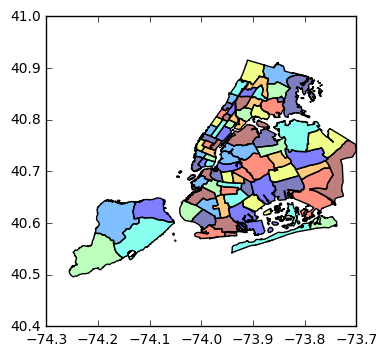

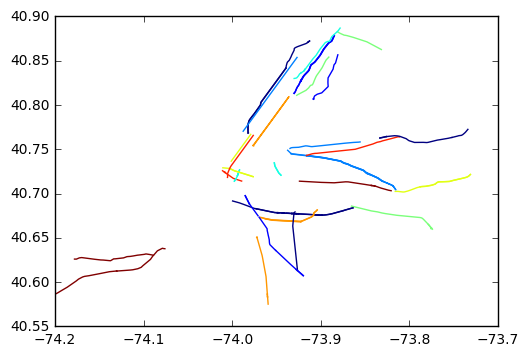

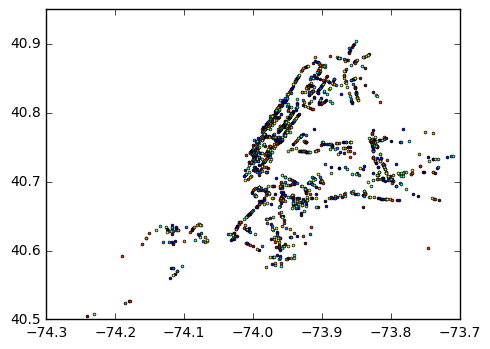

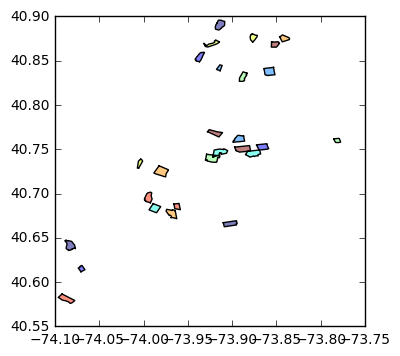

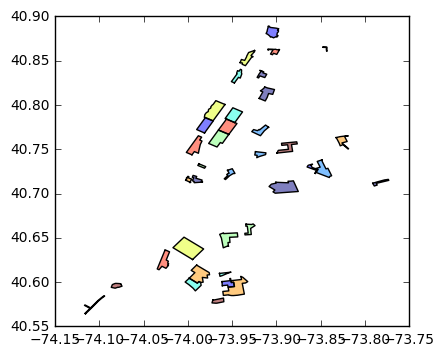

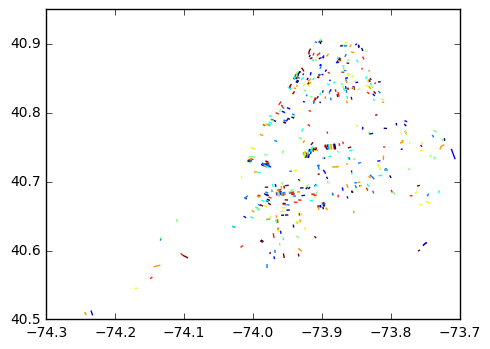

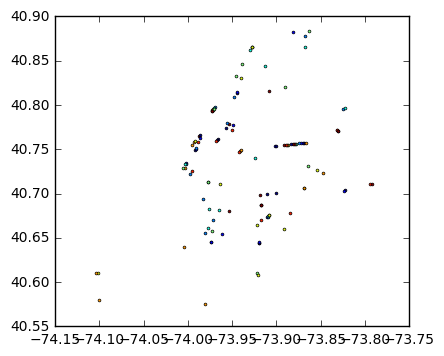

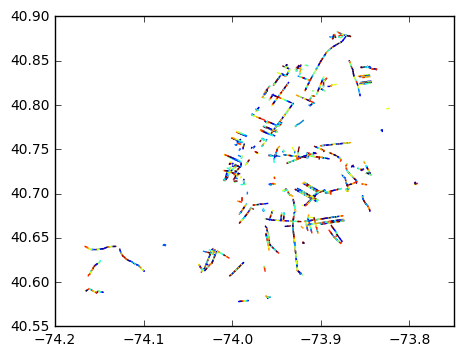

In [350]:
fig = pl.figure(figsize  = (20,20))
precincts.plot()
arterial_slow_zone.plot()
ped_signals.plot()
neigh_slow_zone.plot()
sr_safe_strs.plot()
speed_bumps.plot()
intersec_proj.plot()
corridor_proj.plot()

In [351]:
def add_precincts(df):
    '''creates precinct column based on intersection with precincts data geometry'''
    df_length = len(df)
    prec_array = np.zeros(df_length)
    extra_dict = {}
    extras = []
    for x in range(len(precincts)): 
        '''creates prec, a list of rows which intersect the precinct
        if it intersects more than one precinct, create a list of extras which are stored in extra dict'''
        prec = np.where(df.geometry.intersects(precincts.geometry[x]))
        for i in range(len(prec[0])):
            if prec_array[prec[0][i]] == 0:
                prec_array[prec[0][i]] = str(precincts.Precinct[x])
            else:
                extras.append(prec[0][i])
        if len(extras) > 0: 
            extra_dict[str(precincts.Precinct[x])] = extras
        extras = []
    
    loop_count = 0
    df['precinct'] = prec_array
    
    while len(extra_dict.keys()) > 0:  
        '''while there are keys in extra dict, create a new array and an empty extra_dict2'''
        
        new_array = np.zeros(df_length)
        extra_dict2 = {}
        
        for key in extra_dict.keys(): 
            '''for each key, run a loop inserting the key (precinct #) into the new array)'''
            for i in range(len(extra_dict[key])):
                if new_array[extra_dict[key][i]] == 0:
                    new_array[extra_dict[key][i]] = int(key)
                    
                else:
                    extras.append(extra_dict[key][i])
        
            if len(extras) > 0: 
                extra_dict2[key] = extras
            
            extras = []
            df['precinct' + str(loop_count)] = new_array
        
        extra_dict = extra_dict2
        loop_count += 1
    return df   
        

In [352]:
dfs = [arterial_slow_zone, ped_signals, neigh_slow_zone, sr_safe_strs, speed_bumps, intersec_proj, corridor_proj]

In [353]:
for df in dfs: 
    add_precincts(df)

Lacking Dates: arterial slow zone, ped_signals, intersec_proj, corridor_proj

Year only: neigh slow zone (column called Year), sr_safe_streets (column called yr) <- appears to just be an area where 

Date: speed bumps (FIRST_Inst)

In [354]:
import datetime as dt

In [355]:
#create a year column. All dates that have no year are denoted as '2011' assuming that they were preexisting speed bumps
speed_bumps.FIRST_Inst = pd.to_datetime(speed_bumps.FIRST_Inst, errors = 'coerce')
speed_bumps['year'] = speed_bumps.FIRST_Inst.apply(lambda x: x.strftime('%Y') if pd.isnull(x) == 0 else 2011)

# Assume that speed bumps without dates were built pre-vision zero. Therefore Fill All NA with 11 (before the rest of the data started

In [356]:
speed_df = speed_bumps.iloc[ :, -4:]

In [357]:
# copy the data with an additional precinct, relabel as precinct and concatenate it with the original data
# so that it is counted for each precinct
second_prec = speed_df[speed_df.precinct0 > 0]

In [358]:
second_prec['precinct'] = second_prec['precinct0']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [359]:
speed_all = pd.concat([speed_df, second_prec])

In [360]:
speed_all.drop('precinct0', axis = 1, inplace = True)

In [361]:
speed_all['PrecinctYear'] = speed_all['precinct'].apply(lambda x: str(int(x)).zfill(3)) + speed_all['year'].apply(lambda x: str(x))

In [362]:
tabulated_sb = pd.crosstab(speed_all['year'], speed_all['precinct'])

In [363]:
tabulated_sb.cumsum(axis = 0) 

precinct,1.0,5.0,6.0,7.0,9.0,10.0,13.0,17.0,18.0,19.0,...,110.0,111.0,112.0,113.0,114.0,115.0,120.0,121.0,122.0,123.0
year,,,,,,,,,,,,,,,,,,,,,
2011,0,0,0,0,0,0,0,0,0,0,...,0,1,3,0,1,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,1,3,0,1,0,0,0,0,0
2013,0,0,0,0,0,0,0,1,0,1,...,0,4,4,5,1,0,0,3,2,2
2014,1,2,0,1,13,1,1,1,0,1,...,7,14,7,5,4,14,1,3,5,3
2015,2,2,8,1,13,2,1,1,1,2,...,7,17,7,5,6,14,1,3,5,3


In [364]:
speed_bumps_final = pd.melt(tabulated_sb.cumsum(axis = 0), value_name = 'Speed_Bump_Total') # cumulative b/c they persist

In [365]:
yrs = ['2011', '2012', '2013', '2014', '2015']
speed_bumps_final['year'] = yrs * 73

In [366]:
speed_bumps_final['PrecinctYear'] = speed_bumps_final['precinct'].apply(lambda x: str(int(x)).zfill(3)) + speed_bumps_final['year']

In [367]:
speed_bumps_final.head()

,precinct,Speed_Bump_Total,year,PrecinctYear
0,1.0,0,2011,0012011
1,1.0,0,2012,0012012
2,1.0,0,2013,0012013
3,1.0,1,2014,0012014
4,1.0,2,2015,0012015


In [368]:
neigh_slow_zone.describe()

,Shape_Area,Shape_Leng,Year,precinct,precinct0,precinct1
count,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000
mean,6.569842e+06,11019.593595,2013.555556,75.111111,35.333333,11.851852
std,2.491987e+06,2424.367344,1.187542,37.064739,43.338560,29.470590
min,2.196860e+06,6456.178037,2011.000000,1.000000,0.000000,0.000000
25%,4.593105e+06,9022.106696,2013.000000,45.500000,0.000000,0.000000
50%,7.013031e+06,11343.380217,2013.000000,76.000000,6.000000,0.000000
75%,8.372079e+06,12957.135621,2015.000000,110.000000,79.500000,0.000000
max,1.170054e+07,15578.492915,2015.000000,122.000000,115.000000,110.000000


In [369]:
def add_prec(df):
    '''copies data for additional precincts to the end of the dataframe so it is counted in each precinct'''
    df_copy = df.copy()
    
    for x in df.columns:
        
        if len(x) > 8 and x[:8] == 'precinct':
            tempdf = df[df[x] > 0]
            tempdf['precinct'] = tempdf[x]
            df_copy = df_copy.append(tempdf)
            
    return df_copy

In [370]:
neigh_slow_all = add_prec(neigh_slow_zone)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [371]:
neigh_slow_all.rename(columns = {'Year': 'year'}, inplace = True)

In [372]:
tabulated = pd.crosstab(neigh_slow_all['year'], neigh_slow_all['precinct'])
neigh_slow_final = pd.melt(tabulated, value_name = 'Neigh_Slow_Zone_Total')
neigh_slow_final['year'] = int(len(neigh_slow_final) / 5) * yrs
neigh_slow_final['PrecinctYear'] = neigh_slow_final['precinct'].apply(lambda x: str(int(x)).zfill(3)) + neigh_slow_final['year']

In [373]:
speed_bumps_final.head()

,precinct,Speed_Bump_Total,year,PrecinctYear
0,1.0,0,2011,0012011
1,1.0,0,2012,0012012
2,1.0,0,2013,0012013
3,1.0,1,2014,0012014
4,1.0,2,2015,0012015


In [374]:
neigh_slow_final.head()

,precinct,Neigh_Slow_Zone_Total,year,PrecinctYear
0,1.0,0,2011,0012011
1,1.0,0,2012,0012012
2,1.0,0,2013,0012013
3,1.0,0,2014,0012014
4,1.0,1,2015,0012015


Save as CSVs

In [375]:
speed_bumps_final.to_csv('speed_bumps')
neigh_slow_final.to_csv('neighborhood_slow_zones')

Collect Intersection and Corridor Data by type. There are no dates in the data for these so it may not be that helpful.

In [376]:
tabulated_intersec = pd.crosstab(intersec_proj['SIPProjTyp'], intersec_proj['precinct'])
intersec_final = pd.melt(tabulated_intersec, value_name = 'Intersec_Proj_Total')
intersec_labels = list(tabulated_intersec.index)
intersec_final['type'] = int(len(intersec_final) / len(intersec_labels)) * intersec_labels

In [377]:
tabulated_corridor = pd.crosstab(corridor_proj['SIP_Proj_T'], corridor_proj['precinct'])
corridor_final = pd.melt(tabulated_corridor, value_name = 'Corridor_Proj_Total')
corridor_labels = list(tabulated_corridor.index)
corridor_final['type'] = int(len(corridor_final) / len(corridor_labels)) * corridor_labels

In [378]:
corridor_final.to_csv('street_improvement_project_corridors')
intersec_final.to_csv('street_improvement_project_intesections')

In [1]:
speed_bumps_final.head()

NameError: name 'speed_bumps_final' is not defined